<a href="https://colab.research.google.com/github/shallynagfase9/Data-Science-Masters/blob/main/EDA_With_Students_Performance_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("/content/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
df.shape

(1000, 8)

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [6]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [21]:
df.drop_duplicates(inplace=True)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
%matplotlib inline
import warnings # to remove warnings which will arise
warnings.filterwarnings("ignore")


In [18]:
# Check unique values
df.gender.unique()

array(['female', 'male'], dtype=object)

In [22]:
df.info() # Check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
df.nunique()  # Check number of unique values in every column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [28]:
# Creating two groups (one of categorical feature and one of numerical feature)
[feature for feature in df.columns if df[feature].dtype=='O']  # dtype with object

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [30]:
[feature for feature in df.columns if df[feature].dtype!='O'] # int dtype features

['math_score', 'reading_score', 'writing_score']

In [31]:
# Seggregate categorical feature and numerical feature
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']

In [32]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [33]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [35]:
# aggregate the total score with mean
df["total_score"] = df['math_score']+df['reading_score']+df['writing_score']
df["average_score"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


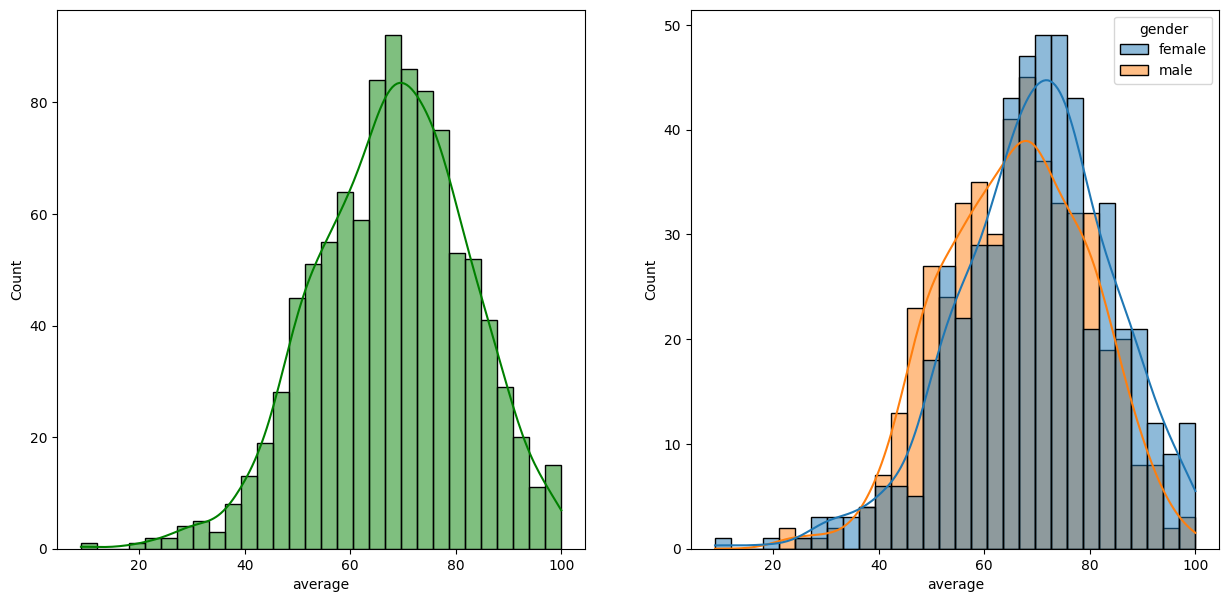

In [49]:
# Explore more Visualization
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2,1,figsize=[15,7])
plt.subplot(121)
sns.histplot(data=df,x="average",kde=True,bins=30,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,bins=30,hue="gender")
plt.show()

# Insights - Female students tend to perform well than male students


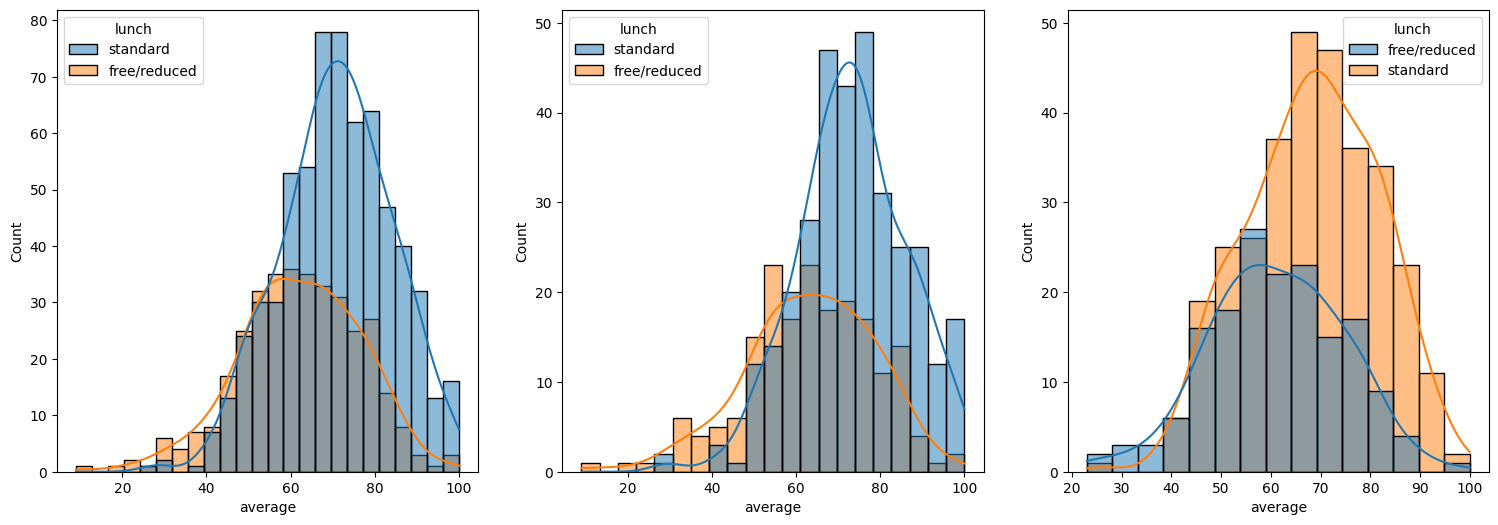

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()
# Conclusion - standard lunch helps perform students well in exam

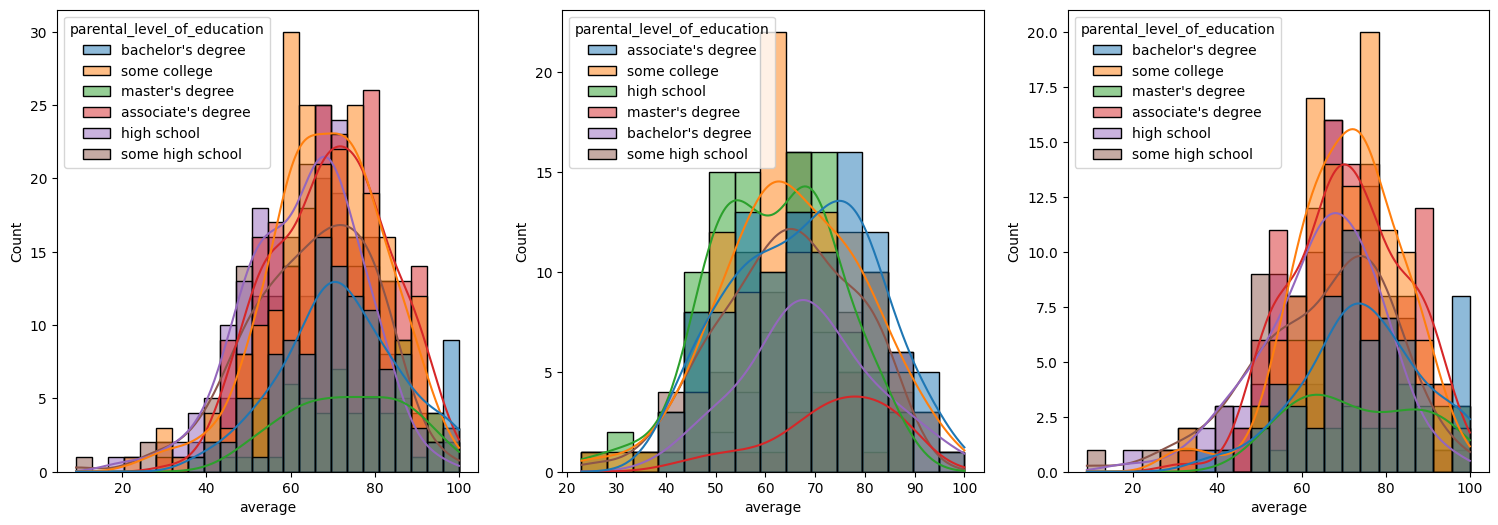

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

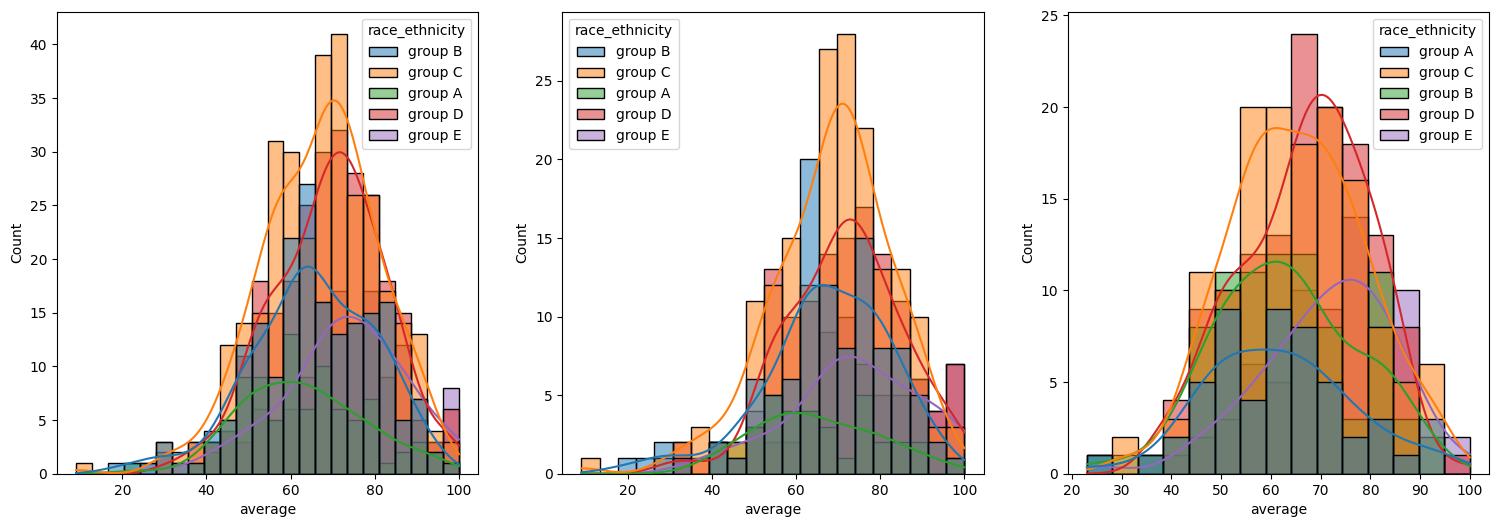

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

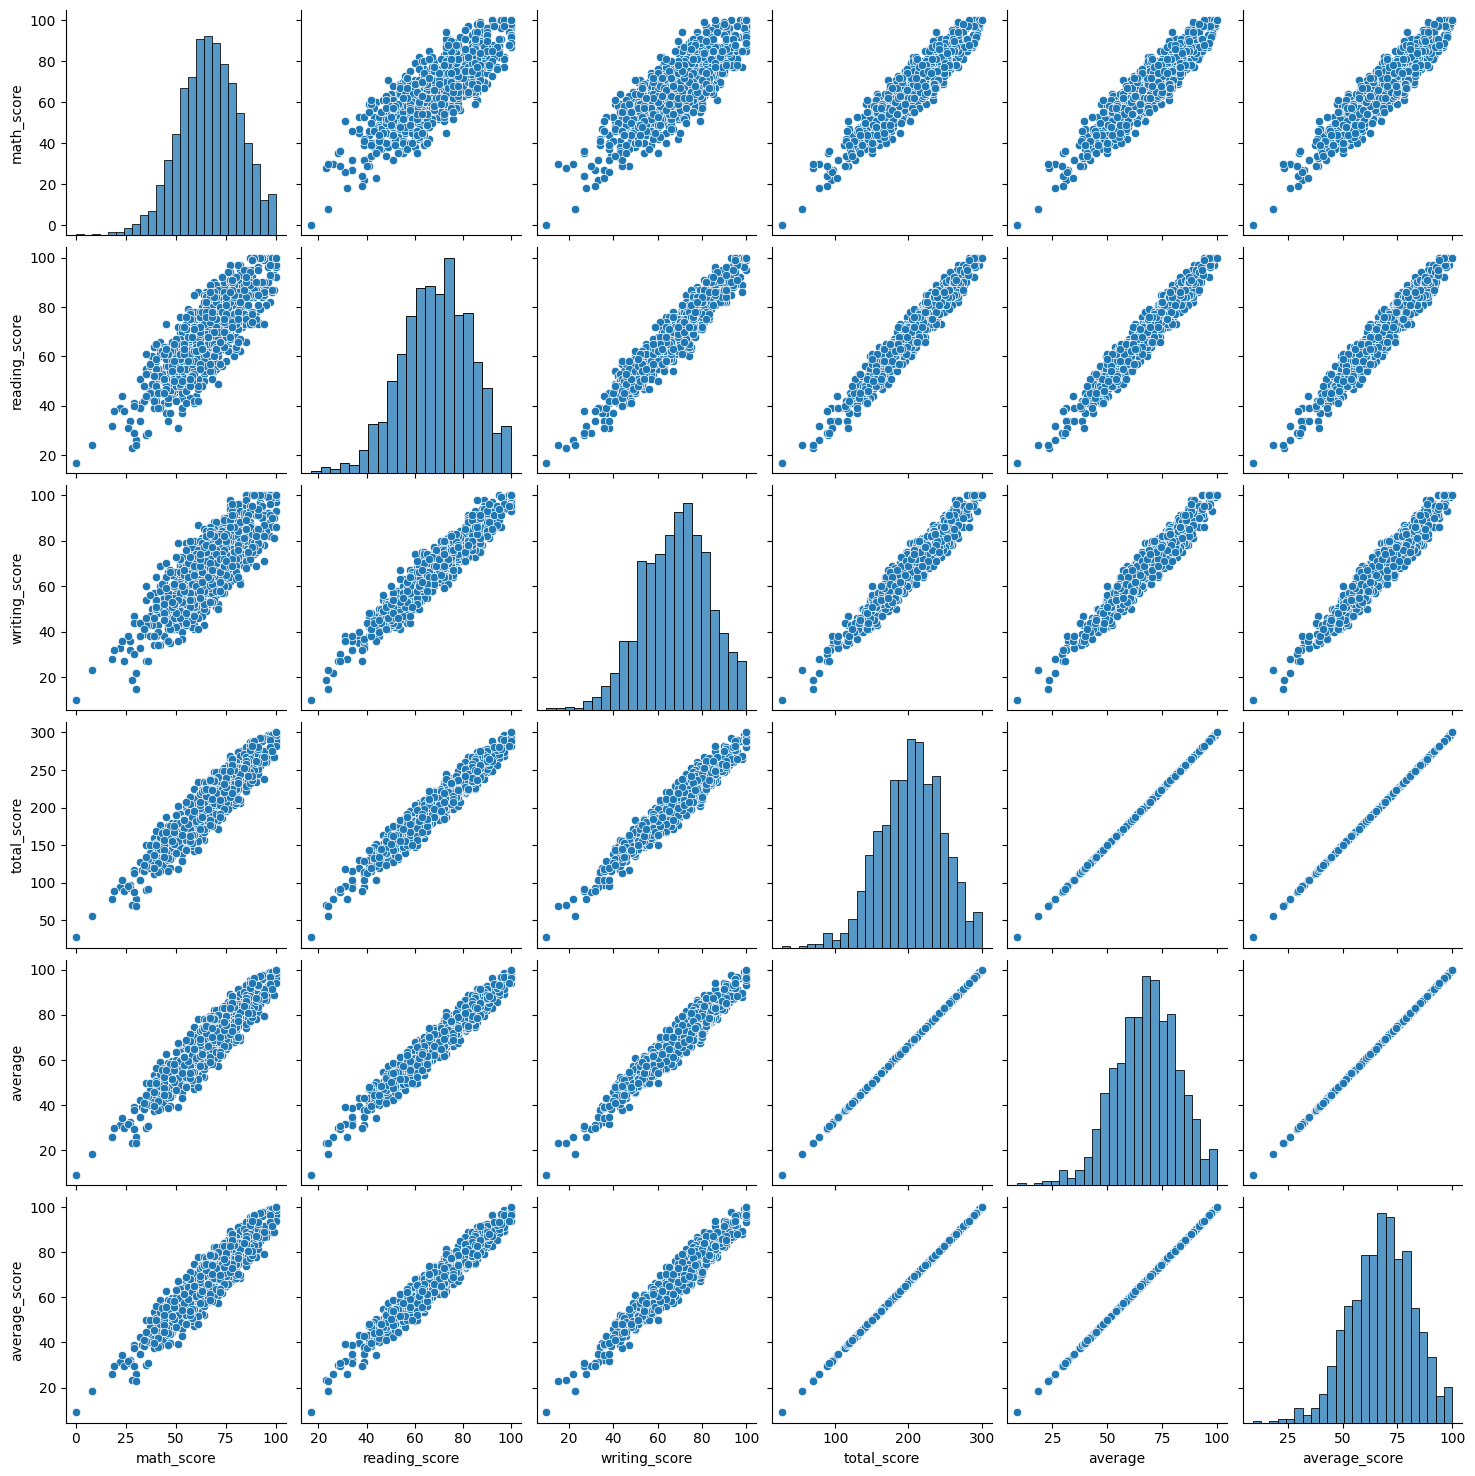

In [54]:
sns.pairplot(df)